## Simple RNN W/O using tensorflow RNN functions

In [53]:
import tensorflow as tf

tf.reset_default_graph()

n_inputs=3
n_neurons=5

x0=tf.placeholder(tf.float32,shape=(None,n_inputs),name="X0")
x1=tf.placeholder(tf.float32,shape=(None,n_inputs),name="X1")

Wx=tf.Variable(tf.random_normal(shape=[n_inputs,n_neurons],dtype=tf.float32),name="Wx")
Wy=tf.Variable(tf.random_normal(shape=[n_neurons,n_neurons],dtype=tf.float32),name="Wy")
b=tf.Variable(tf.zeros(shape=([1,n_neurons])))

y0=tf.matmul(x0,Wx)
y1=tf.matmul(x1,Wx)+tf.matmul(y0,Wy)+b

init=tf.global_variables_initializer()

In [27]:
import numpy as np
x0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]]) # t = 0
x1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]]) # t = 1

with tf.Session() as sess:
    init.run()
    y0_vals,y1_vals=sess.run([y0,y1],feed_dict={x0:x0_batch,x1:x1_batch})
print(y0_vals)
print(y1_vals)

[[ 9.0812564e-02 -2.8650305e+00 -2.3880649e+00  1.1188209e+00
  -3.6806931e+00]
 [-2.5204048e+00 -5.3564157e+00 -6.0520935e+00  1.1440754e-02
  -1.0860765e+01]
 [-5.1316218e+00 -7.8478012e+00 -9.7161217e+00 -1.0959387e+00
  -1.8040836e+01]
 [-1.0172331e+00  3.3382692e+00  1.4483972e+00 -3.3882518e+00
  -2.4960127e+00]]
[[ -0.175529   -8.545042  -14.241538   -0.8093784 -13.797403 ]
 [ 15.98143    -4.32777   -10.487624    6.728236    8.342694 ]
 [ 18.900677   -6.8373647 -20.277723    6.49131     1.9438171]
 [ -7.724701    3.8511643   1.6278627  -6.311737   -7.3366685]]


## Static_RNN AND BasicRNNCell

In [30]:
#Now Tensorflow way of doing the above network for the network
tf.reset_default_graph()
x0=tf.placeholder(tf.float32,shape=(None,n_inputs),name="X0")
x1=tf.placeholder(tf.float32,shape=(None,n_inputs),name="X1")

basic_cell=tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
output_seqs,states=tf.contrib.rnn.static_rnn(basic_cell,[x0,x1],dtype=tf.float32)

y0,y1=output_seqs,states

init=tf.global_variables_initializer()

In [33]:
x0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]])
x1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]])

with tf.Session() as sess:
    init.run()
    y0_val, y1_val = sess.run([y0, y1], feed_dict={x0: x0_batch, x1: x1_batch})
print(y0_val)
print("\n",y1_val)

[array([[ 0.74003327,  0.9556061 , -0.43144444,  0.6536568 , -0.1124929 ],
       [ 0.94713837,  0.9999988 , -0.8471818 , -0.30985865,  0.8699846 ],
       [ 0.99018216,  1.        , -0.96612   , -0.8901057 ,  0.9923167 ],
       [-0.99929696,  0.9999211 , -0.9961863 , -0.99995893,  0.9999293 ]],
      dtype=float32), array([[ 0.8663176 ,  1.        , -0.94874305, -0.99955714,  0.9995443 ],
       [-0.7948404 ,  0.53345335, -0.14239766,  0.15115844, -0.8100895 ],
       [-0.46268508,  1.        , -0.8624281 , -0.99406844,  0.9037161 ],
       [-0.4824497 ,  0.99981195,  0.1759368 , -0.882409  ,  0.4018567 ]],
      dtype=float32)]

 [[ 0.8663176   1.         -0.94874305 -0.99955714  0.9995443 ]
 [-0.7948404   0.53345335 -0.14239766  0.15115844 -0.8100895 ]
 [-0.46268508  1.         -0.8624281  -0.99406844  0.9037161 ]
 [-0.4824497   0.99981195  0.1759368  -0.882409    0.4018567 ]]


## RNN with stacking of Inputs

In [39]:
# Stacking the RNN so we need not have too many tensors for various timestamps
tf.reset_default_graph()
n_steps = 2
n_inputs = 3
n_neurons = 5

x=tf.placeholder(tf.float32,shape=(None,n_steps,n_inputs),name="X")
x_seqs=tf.unstack(tf.transpose(x,perm=[1,0,2]))

basic_cell=tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
output_seqs,states=tf.contrib.rnn.static_rnn(basic_cell,x_seqs,dtype=tf.float32)

outputs=tf.transpose(tf.stack(output_seqs),perm=[1,0,2])
init=tf.global_variables_initializer()

In [47]:
X_batch = np.array([
        # t = 0      t = 1 
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])

with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={x: X_batch})
print(outputs_val)
print("\n \n",np.transpose(outputs_val,axes=[1,0,2])[1])

[[[-0.930358    0.9045304  -0.24748811 -0.42630658 -0.61943436]
  [-0.99999917  0.9999984   0.9996984  -0.18279424  0.7930187 ]]

 [[-0.99979234  0.99949425  0.7584124  -0.6909907  -0.69095224]
  [-0.1424788   0.43080735  0.1465929   0.1729148   0.7863861 ]]

 [[-0.9999994   0.9999974   0.9774836  -0.8466843  -0.7510958 ]
  [-0.99964106  0.9995959   0.9934347  -0.190308    0.9148729 ]]

 [[ 0.3203804  -0.618571    0.99971133 -0.9899922   0.43619227]
  [-0.7627065   0.7579293   0.9160083  -0.29360732  0.00841538]]]

 
 [[-0.99999917  0.9999984   0.9996984  -0.18279424  0.7930187 ]
 [-0.1424788   0.43080735  0.1465929   0.1729148   0.7863861 ]
 [-0.99964106  0.9995959   0.9934347  -0.190308    0.9148729 ]
 [-0.7627065   0.7579293   0.9160083  -0.29360732  0.00841538]]


## Dynamic RNN 
* Using Dynamic RNN to let tensorflow take care of stacking and unstacking of the inputs and outputs 

In [55]:
tf.reset_default_graph()

x=tf.placeholder(tf.float32,shape=(None,n_steps,n_inputs),name="X")

basic_cell=tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs,states=tf.nn.dynamic_rnn(basic_cell,x,dtype=tf.float32)
init=tf.global_variables_initializer()

In [51]:
X_batch = np.array([
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])

with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={x: X_batch})
print(outputs_val)

[[[ 0.6586341  -0.6124594   0.47677097  0.49193087  0.00965899]
  [ 0.9995298  -0.99806017  0.99739367  0.8310786  -0.99995786]]

 [[ 0.9815747  -0.95523304  0.96876043  0.80641115 -0.9518549 ]
  [ 0.7059932  -0.29594195 -0.8804247   0.02214627  0.19069909]]

 [[ 0.9991602  -0.99564713  0.9985798   0.93475026 -0.9988072 ]
  [ 0.9964287  -0.964249    0.803715    0.57236785 -0.99823266]]

 [[ 0.97076213 -0.99568415  0.99991983 -0.99876624 -0.9928207 ]
  [ 0.9905062   0.32766512  0.55990165 -0.2761857  -0.9494968 ]]]


## RNN with Variable Input Sequence Lengths

In [69]:
n_steps = 2
n_inputs = 3
n_neurons = 5

tf.reset_default_graph()
seq_len=tf.placeholder(tf.int32,shape=(None),name="seq_len")
x=tf.placeholder(tf.float32,shape=(None,n_steps,n_inputs),name="X")
basic_cell=tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs,states=tf.nn.dynamic_rnn(basic_cell,x,sequence_length=seq_len,dtype=tf.float32)
init=tf.global_variables_initializer()

In [70]:
X_batch = np.array([
        # step 0     step 1
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2 (padded with zero vectors)
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])
seq_length_batch = np.array([2, 1, 2, 2])

In [75]:
with tf.Session() as sess:
    init.run()
    outputs_val,states_val=sess.run([outputs,states],feed_dict={x:X_batch,seq_len:seq_length_batch})
print(outputs_val)
print("\n \n",states_val)

[[[-0.35427052 -0.3422693   0.8150374  -0.19849965  0.3299863 ]
  [ 0.7430908   0.9963403   0.9999999  -0.9978442  -0.9952052 ]]

 [[-0.10068563  0.40864825  0.9997297  -0.8906001  -0.52637225]
  [ 0.          0.          0.          0.          0.        ]]

 [[ 0.1666925   0.84101635  0.9999997  -0.9900362  -0.9074771 ]
  [ 0.30960947  0.93132246  0.9999569  -0.9357002  -0.67784286]]

 [[-0.13345692  0.72786283  0.9985916  -0.269285   -0.99587643]
  [ 0.2730676   0.7494386   0.9877511  -0.63732487 -0.37285656]]]

 
 [[ 0.7430908   0.9963403   0.9999999  -0.9978442  -0.9952052 ]
 [-0.10068563  0.40864825  0.9997297  -0.8906001  -0.52637225]
 [ 0.30960947  0.93132246  0.9999569  -0.9357002  -0.67784286]
 [ 0.2730676   0.7494386   0.9877511  -0.63732487 -0.37285656]]


## Training RNN over MNIST
* Here the pixel values in each row are treated as values for particular timestamp and each row is treated as step(frame)

In [98]:
tf.reset_default_graph()

n_steps=28
n_inputs=28
n_neurons=100
n_outputs=10
learning_rate=0.001
n_layers=3

x=tf.placeholder(tf.float32,shape=(None,n_steps,n_inputs),name="X")
y=tf.placeholder(tf.int32,shape=(None),name="Y")

layers=[tf.contrib.rnn.BasicRNNCell(num_units=n_neurons,activation=tf.nn.relu) for layer in range(n_layers)]

multi_layer_cell=tf.contrib.rnn.MultiRNNCell(layers)
outputs,states=tf.nn.dynamic_rnn(multi_layer_cell,x,dtype=tf.float32)

states_concat=tf.concat(values=states,axis=1)
logits=tf.layers.dense(states_concat,n_outputs,name="logits")
xentropy=tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits)

loss=tf.reduce_mean(xentropy)
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op=optimizer.minimize(loss)

correct=tf.nn.in_top_k(logits,y,1)
accuracy=tf.reduce_mean(tf.cast(correct,tf.float32))

init=tf.global_variables_initializer()

In [99]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")
X_test = mnist.test.images.reshape((-1, n_steps, n_inputs))
y_test = mnist.test.labels

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [100]:
n_epochs = 10
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_op, feed_dict={x: X_batch, y: y_batch})
        if(epoch%1==0):
            acc_train = accuracy.eval(feed_dict={x: X_batch, y: y_batch})
            acc_test = accuracy.eval(feed_dict={x: X_test, y: y_test})
            print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test) 

0 Train accuracy: 0.92 Test accuracy: 0.9441
1 Train accuracy: 0.96 Test accuracy: 0.9679
2 Train accuracy: 0.98 Test accuracy: 0.9696
3 Train accuracy: 1.0 Test accuracy: 0.9603
4 Train accuracy: 0.9533333 Test accuracy: 0.9705
5 Train accuracy: 0.9866667 Test accuracy: 0.9773
6 Train accuracy: 0.9866667 Test accuracy: 0.9764
7 Train accuracy: 0.99333334 Test accuracy: 0.9771
8 Train accuracy: 0.9866667 Test accuracy: 0.98
9 Train accuracy: 0.9866667 Test accuracy: 0.9815


## Predicting Time Series Data

In [115]:
t_min, t_max = 0, 30
resolution = 0.1

def time_series(t):
    return t * np.sin(t) / 3 + 2 * np.sin(t*5)

def next_batch(batch_size, n_steps):
    t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
    Ts = t0 + np.arange(0., n_steps + 1) * resolution
    ys = time_series(Ts)
    return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)

t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))

n_steps = 20
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1)

In [105]:
tf.reset_default_graph()

n_steps=20
n_inputs=1
n_outputs=1
n_neurons=100
learning_rate=0.001

x=tf.placeholder(tf.float32,shape=(None,n_steps,n_inputs),name="X")
y=tf.placeholder(tf.float32,shape=(None,n_steps,n_outputs),name="Y")

basic_cell=tf.contrib.rnn.OutputProjectionWrapper(tf.contrib.rnn.BasicRNNCell(num_units=n_neurons,activation=tf.nn.relu),output_size=n_outputs)
outputs,states=tf.nn.dynamic_rnn(basic_cell,x,dtype=tf.float32)

loss=tf.reduce_mean(tf.square(outputs-y))
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op=optimizer.minimize(loss)

init=tf.global_variables_initializer()

saver=tf.train.Saver()

In [112]:
n_iterations = 1500
batch_size = 1

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        #print(X_batch.shape,y_batch.shape)
        sess.run(training_op, feed_dict={x: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={x: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    saver.save(sess, "./my_time_series_model") # not shown in the book

0 	MSE: 8.274572
100 	MSE: 0.25936896
200 	MSE: 0.2552865
300 	MSE: 0.13591282
400 	MSE: 0.107935034
500 	MSE: 0.20492487
600 	MSE: 0.14064404
700 	MSE: 0.022174116
800 	MSE: 0.05056225
900 	MSE: 0.15887114
1000 	MSE: 0.062135894
1100 	MSE: 0.17895314
1200 	MSE: 0.38262194
1300 	MSE: 0.05276636
1400 	MSE: 0.028716287


In [147]:
with tf.Session() as sess:
    saver.restore(sess,"./my_time_series_model")
    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred=sess.run([outputs],feed_dict={x:X_new})
    print(y_pred)

INFO:tensorflow:Restoring parameters from ./my_time_series_model
[array([[[-3.0132334],
        [-1.8682754],
        [-1.1837697],
        [ 0.4187964],
        [ 2.0813124],
        [ 3.2795546],
        [ 3.576901 ],
        [ 3.3063116],
        [ 2.816707 ],
        [ 2.1406424],
        [ 1.5734649],
        [ 1.4345524],
        [ 1.7735927],
        [ 2.5694036],
        [ 3.6571267],
        [ 4.895169 ],
        [ 5.962173 ],
        [ 6.6444993],
        [ 6.680593 ],
        [ 6.096717 ]]], dtype=float32)]


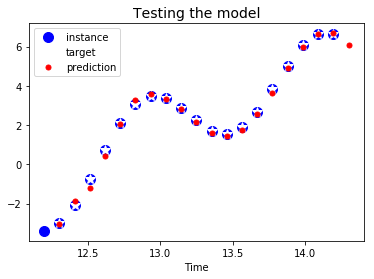

In [148]:
import matplotlib.pyplot as plt

plt.title("Testing the model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.plot(t_instance[1:], np.array(y_pred).reshape(20,-1), "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()